###[BIX Tecnologia] Desafio Técnico - Vaga de Cientista de Dados

Vamos começar carregando e explorando os dados do arquivo air_system_previous_years.csv para entender sua estrutura e realizar as análises necessárias para o desenvolvimento do modelo de machine learning.

**Passos:**

1. Carregar os dados e verificar sua estrutura.
2. Limpar e pré-processar os dados.
3. Analisar os dados para identificar padrões e variáveis importantes.
4. Selecionar variáveis e reduzir a dimensionalidade, se necessário.
5. Desenvolver e treinar modelos preditivos.
6. Avaliar e selecionar o melhor modelo.
7. Documentar e enviar o código para o GitHub.

# 1. Carregar os dados e verificar sua estrutura

Primeiramente, vamos carregar o arquivo e exibir as primeiras linhas para entender a estrutura dos dados.

In [1]:
import pandas as pd

# Carregar o arquivo CSV
file_path = 'air_system_previous_years.csv'
data = pd.read_csv(file_path)

# Exibir as primeiras linhas do dataframe
data.head()


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


**Observações Iniciais**

 - Os dados possuem 171 colunas, sendo que a primeira coluna class indica se o caminhão teve um defeito no sistema de ar (pos) ou em outro sistema (neg).
 - Algumas colunas têm valores faltantes  que precisam ser tratados.

**Próximos Passos**

1. Tratamento de Dados Faltantes: Verificar a quantidade de valores faltantes e decidir como tratá-los.
2. Análise Exploratória: Identificar padrões nos dados que possam ajudar na construção do modelo.
3. Seleção de Variáveis: Escolher as variáveis mais relevantes para o modelo.
Construção e Avaliação do Modelo: Desenvolver modelos de machine learning e avaliar seu desempenho.

# 2. Limpar e pré-processar os dados.

## Verificação das colunas com valores nulos




In [12]:
import pandas as pd
from IPython.display import display, HTML
# Carregar os dados
data = pd.read_csv('air_system_previous_years.csv', na_values=['na', 'N/A', ''])

# Verificar a quantidade de valores nulos em cada coluna
null_counts = data.isnull().sum()

# Calcular a porcentagem de valores nulos
total_rows = len(data)
null_percentage = (null_counts / total_rows) * 100

# Garantir a correspondência entre as colunas e suas porcentagens
df_nulos = pd.DataFrame({'Nº de Nulos': null_counts, 'Porcentagem (%)': null_percentage})
df_nulos = df_nulos[df_nulos['Nº de Nulos'] > 0].sort_values(by='Nº de Nulos', ascending=False)
df_nulos.index.name = 'Nome Coluna'
print(f'Quantidade registros no dataset: {total_rows}')
print(f'Quantidade de colunas com valores nulos: {len(df_nulos)}')
print(f'Quantidade de colunas sem valores nulos: {len(data.columns) - len(df_nulos)}')
# Exibe o DataFrame de forma mais bonita
display(HTML(df_nulos.to_html()))

Quantidade registros no dataset: 60000
Quantidade de colunas com valores nulos: 169
Quantidade de colunas sem valores nulos: 2


,Nº de Nulos,Porcentagem (%)
Nome Coluna,,
br_000,49264,82.106667
bq_000,48722,81.203333
bp_000,47740,79.566667
bo_000,46333,77.221667
ab_000,46329,77.215000
cr_000,46329,77.215000
bn_000,44009,73.348333
bm_000,39549,65.915000
bl_000,27277,45.461667


## Tratamento de Dados Faltantes

Após identificar as colunas com valores nulos, podemos decidir como tratá-los.

In [14]:
# Remoção de Colunas: Remover colunas inteiras que contêm > 10% valores nulos.
clean_data_1 = data.dropna(axis=1, thresh=int(0.9 * total_rows))
display(clean_data_1.head())

,class,aa_000,ac_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,2.130706e+09,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,2.280000e+02,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,7.000000e+01,0.0,10.0,0.0,0.0,0.0,318.0,2212.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,1.368000e+03,0.0,0.0,0.0,0.0,0.0,0.0,43752.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [19]:
# verificar linhas com valores nulos
null_data = clean_data_1[clean_data_1.isnull().any(axis=1)]
display(null_data)

,class,aa_000,ac_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
23,pos,453236,2926.0,0.0,0.0,0.0,0.0,222.0,323436.0,2999280.0,...,7908038.0,3026002.0,5025350.0,2025766.0,1160638.0,533834.0,493800.0,6914.0,0.0,0.0
28,neg,1870,NaN,0.0,0.0,0.0,0.0,0.0,0.0,140.0,...,7688.0,5050.0,33502.0,40466.0,1436.0,34.0,0.0,0.0,0.0,0.0
37,neg,48600,NaN,NaN,NaN,0.0,0.0,0.0,2370.0,412508.0,...,442746.0,129678.0,158816.0,166142.0,251490.0,896136.0,2432.0,178.0,NaN,NaN
56,neg,24836,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,pos,72504,1594.0,0.0,0.0,0.0,244.0,178226.0,1249396.0,3813464.0,...,1432098.0,372252.0,527514.0,358274.0,332818.0,284178.0,3742.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59915,neg,167526,NaN,NaN,NaN,0.0,0.0,9904.0,406228.0,3763634.0,...,600752.0,267784.0,574248.0,514926.0,1173374.0,3947770.0,338.0,0.0,NaN,NaN
59929,neg,24,38.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
59931,neg,98,58.0,0.0,0.0,0.0,0.0,0.0,0.0,2562.0,...,594.0,180.0,308.0,168.0,338.0,1964.0,0.0,0.0,0.0,0.0
59956,neg,32914,0.0,0.0,0.0,0.0,0.0,0.0,0.0,478.0,...,277734.0,168604.0,453464.0,369624.0,167300.0,52350.0,32204.0,24.0,0.0,0.0


In [44]:
# Remover linhas com valores nulos
clean_data_2 = clean_data_1.dropna()
display(clean_data_2.head())

,class,aa_000,ac_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,2.130706e+09,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,2.280000e+02,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,7.000000e+01,0.0,10.0,0.0,0.0,0.0,318.0,2212.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,1.368000e+03,0.0,0.0,0.0,0.0,0.0,0.0,43752.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [25]:
# Verificar numero de linhas e colunas após a limpeza
print(f'Número de linhas antes da limpeza: {total_rows}')
print(f'Número de linhas após a limpeza: {len(clean_data_2)}')
print(f'Número de colunas antes da limpeza: {len(data.columns)}')
print(f'Número de colunas após a limpeza: {len(clean_data_2.columns)}')

Número de linhas antes da limpeza: 60000
Número de linhas após a limpeza: 54143
Número de colunas antes da limpeza: 171
Número de colunas após a limpeza: 143


# 3 e 4. Analisar dados para identificar padrões e selecionar variáveis para reduzir a dimensionalidade

In [27]:
# verificar colunas com 0
zero_counts = (clean_data_2 == 0).sum()
zero_percentage = (zero_counts / total_rows) * 100
df_zeros = pd.DataFrame({'Nº de Zeros': zero_counts, 'Porcentagem (%)': zero_percentage})
df_zeros = df_zeros[df_zeros['Nº de Zeros'] > 0].sort_values(by='Nº de Zeros', ascending=False)
df_zeros.index.name = 'Nome Coluna'
print(f'Quantidade de colunas com valores zerados: {len(df_zeros)}')
# Exibe o DataFrame de forma mais bonita
display(HTML(df_zeros.to_html()))

Quantidade de colunas com valores zerados: 140


,Nº de Zeros,Porcentagem (%)
Nome Coluna,,
as_000,54138,90.230000
au_000,54109,90.181667
ag_000,54041,90.068333
dj_000,53962,89.936667
dl_000,53932,89.886667
ef_000,53901,89.835000
dm_000,53899,89.831667
dz_000,53873,89.788333
dk_000,53847,89.745000


In [28]:
# verificar linhas com zero
zero_data = clean_data_2[(clean_data_2 == 0).any(axis=1)]
display(zero_data)

,class,aa_000,ac_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,2.130706e+09,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,2.280000e+02,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,7.000000e+01,0.0,10.0,0.0,0.0,0.0,318.0,2212.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,1.368000e+03,0.0,0.0,0.0,0.0,0.0,0.0,43752.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,6.640000e+02,0.0,0.0,0.0,0.0,0.0,2564.0,59100.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,neg,2286,2.130707e+09,0.0,0.0,0.0,0.0,0.0,0.0,104.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,neg,112,2.130706e+09,0.0,0.0,0.0,0.0,0.0,0.0,28.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,neg,80292,2.130706e+09,0.0,0.0,0.0,0.0,0.0,0.0,330.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


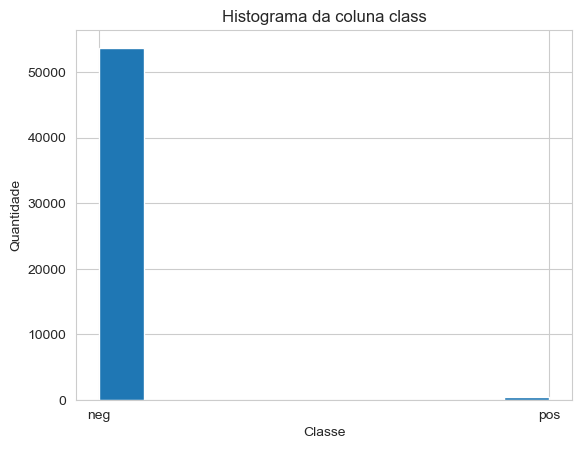

In [42]:
# plotar histograma da coluna class
import matplotlib.pyplot as plt
clean_data_2['class'].hist()
plt.title('Histograma da coluna class')
plt.xlabel('Classe')
plt.ylabel('Quantidade')
plt.show()

Quantidade de cada classe antes:
class
0    53738
1      405
Name: count, dtype: int64
Quantidade de cada classe depois:
class
0    53738
1      405
Name: count, dtype: int64


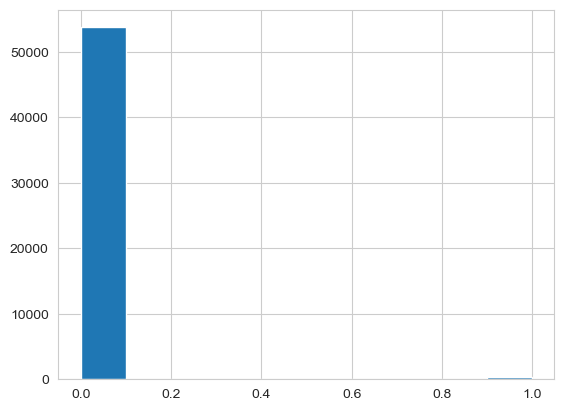

In [45]:
# converter neg para 0 e pos para 1 da coluna class
clean_data_3 = clean_data_2.copy()
clean_data_3.loc[:, 'class'] = clean_data_2['class'].map({'neg': 0, 'pos': 1})
clean_data_3['class'].hist()

# imprimir quantidades de cada classe antes e depois
print('Quantidade de cada classe antes:')
print(clean_data_3['class'].value_counts())
print('Quantidade de cada classe depois:')
print(clean_data_3['class'].value_counts())

In [65]:
# Fazer analise de correlação e plotar heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que 'clean_data_3' é o seu DataFrame original
# Calcular a matriz de correlação
correlation_matrix = clean_data_3.corr()

# Remover colunas com correlação absoluta maior ou igual a 90% entre si
columns = correlation_matrix.columns
drop_columns = []
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        if abs(correlation_matrix.iloc[i, j]) >= 0.9:
            drop_columns.append(columns[j])

clean_data_4 = clean_data_3.drop(columns=drop_columns)
print(f'Número de colunas antes da limpeza: {len(clean_data_3.columns)}')
print(f'Número de colunas após a limpeza: {len(clean_data_4.columns)}')

Número de colunas antes da limpeza: 143
Número de colunas após a limpeza: 106


In [66]:
correlation_matrix = clean_data_4.corr()

In [186]:
# Selecionar colunas com correlação absoluta maior ou igual a 20% com 'class'
correlated_columns = correlation_matrix.index[correlation_matrix['class'].abs() >= 0.20]

# Filtrar o DataFrame original para manter apenas as colunas selecionadas
clean_data_5 = clean_data_4[correlated_columns]

# Mostrar as colunas remanescentes
print("Colunas mantidas com correlação absoluta maior ou igual a 20% com 'class':")
print(clean_data_5.columns)
print(f"Numero de colunas antes: {len(clean_data_4.columns)}")
print(f"Numero de colunas depois: {len(clean_data_5.columns)}")

Colunas mantidas com correlação absoluta maior ou igual a 20% com 'class':
Index(['class', 'aa_000', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006',
       'al_000', 'ay_002', 'ay_008', 'az_001', 'az_005', 'az_007', 'ba_000',
       'ba_001', 'ba_006', 'ba_007', 'bc_000', 'bx_000', 'ce_000', 'cj_000',
       'ck_000', 'cn_000', 'cn_002', 'cn_003', 'cs_000', 'cs_001', 'cs_002',
       'cs_003', 'cs_004', 'dd_000', 'de_000', 'dg_000', 'di_000', 'do_000',
       'ds_000', 'eb_000', 'ee_000', 'ee_001', 'ee_005', 'ee_006'],
      dtype='object')
Numero de colunas antes: 106
Numero de colunas depois: 41


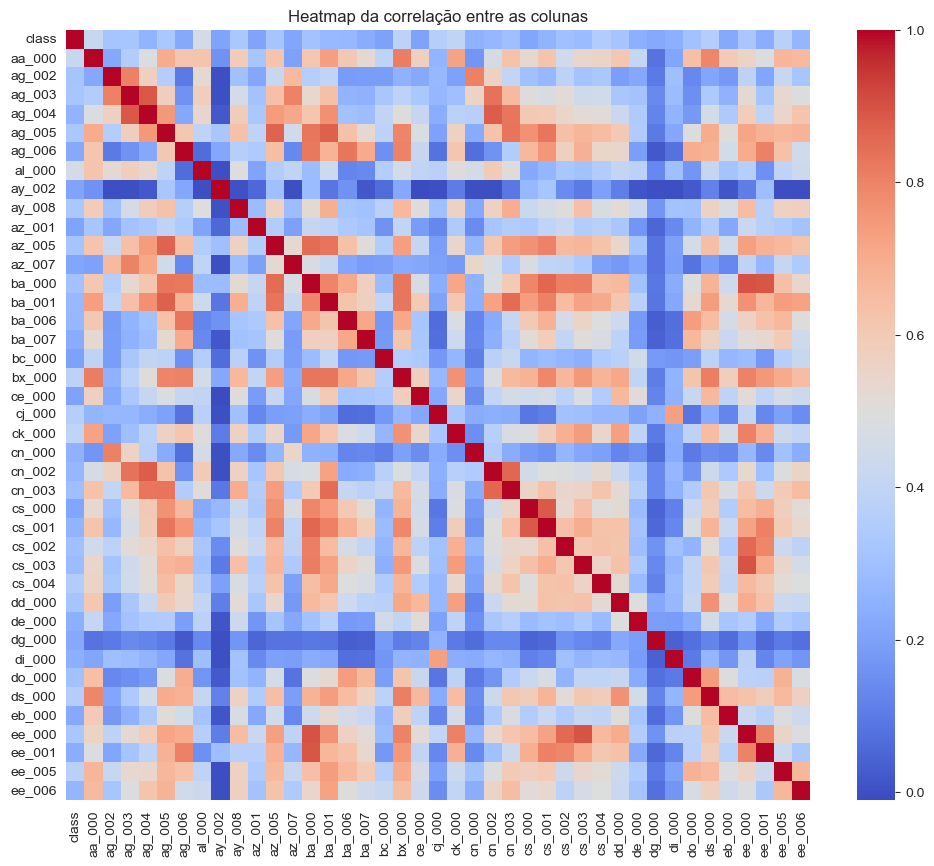

In [70]:
## plotar heatmap da correlação do novo dataframe
plt.figure(figsize=(12, 10))
sns.heatmap(clean_data_5.corr(), annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap da correlação entre as colunas')
plt.show()

## Segunda Analise

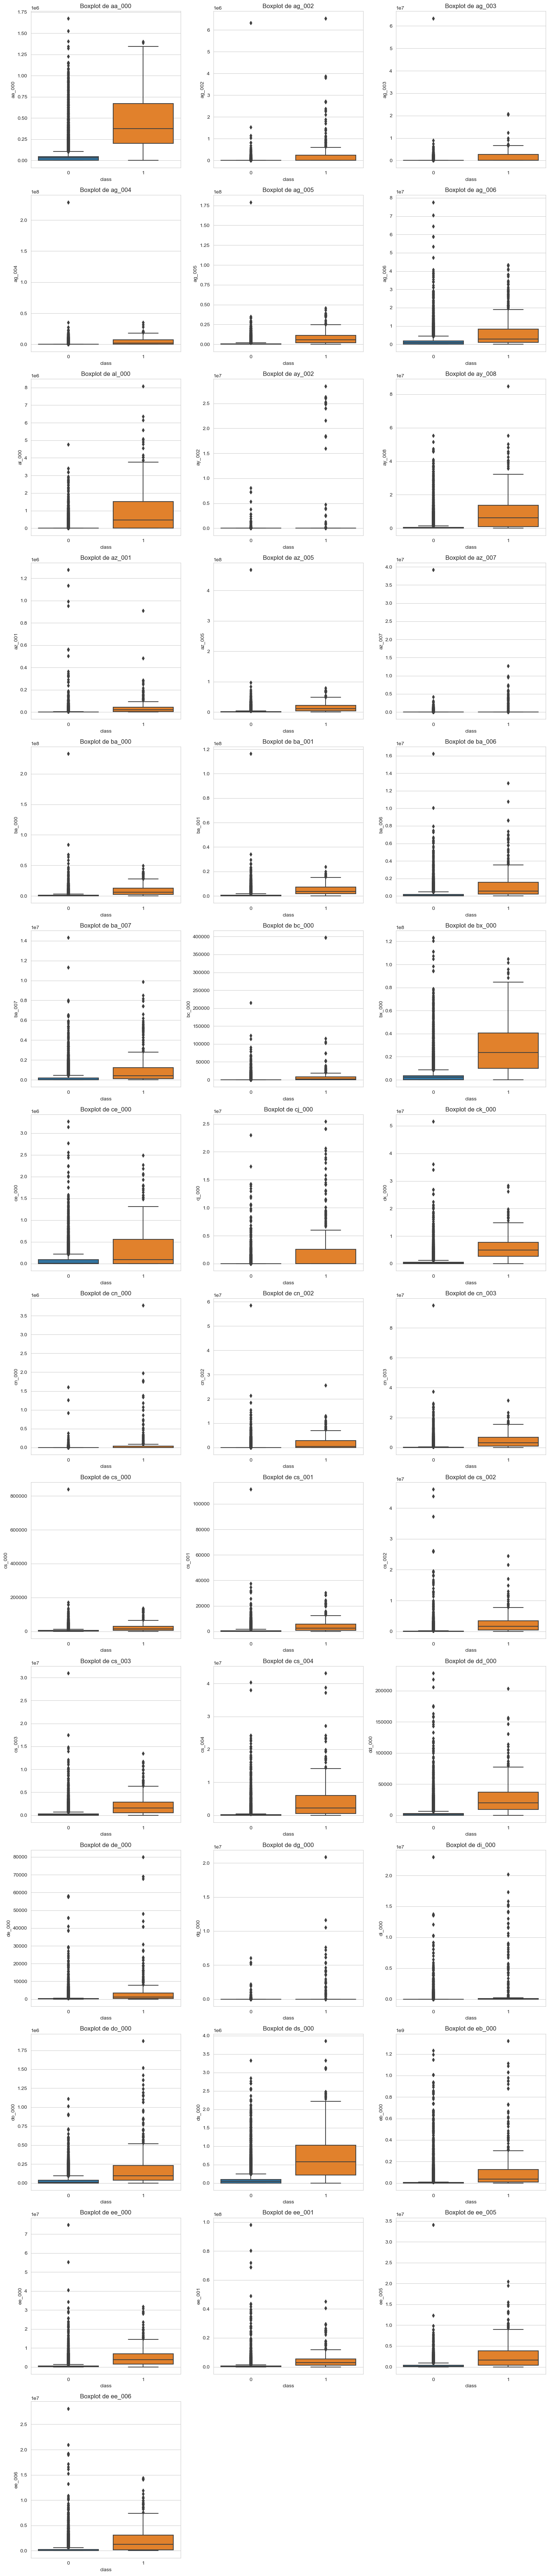

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecionar as colunas que não são a 'class'
columns = clean_data_5.columns.drop('class')

# Calcular o número de subplots necessários
n_cols = len(columns)
n_rows = (n_cols + 2) // 3  # Arredonda para cima se necessário

# Plotar boxplots para cada coluna
plt.figure(figsize=(15, 5 * n_rows))  # Ajuste a altura conforme necessário
for i, column in enumerate(columns):
    plt.subplot(n_rows, 3, i + 1)  # Ajuste o número de colunas por linha aqui, se necessário
    sns.boxplot(x='class', y=column, data=clean_data_5)
    plt.title(f'Boxplot de {column}')

plt.tight_layout()  # Melhora a disposição dos subplots para evitar sobreposição
plt.show()


In [73]:
## calcular e imprimir porcentagem de outliers por coluna

# Calcular os limites inferior e superior para cada coluna
outliers = {}
for column in columns:
    q1 = clean_data_5[column].quantile(0.25)
    q3 = clean_data_5[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Contar a quantidade de outliers
    n_outliers = ((clean_data_5[column] < lower_bound) | (clean_data_5[column] > upper_bound)).sum()
    outliers[column] = n_outliers

# Calcular a porcentagem de outliers
total_rows = len(clean_data_5)
outliers_percentage = {column: (n_outliers / total_rows) * 100 for column, n_outliers in outliers.items()}
df_outliers = pd.DataFrame({'Nº de Outliers': outliers, 'Porcentagem (%)': outliers_percentage})
df_outliers = df_outliers[df_outliers['Nº de Outliers'] > 0].sort_values(by='Nº de Outliers', ascending=False)
df_outliers.index.name = 'Nome Coluna'

# Exibir o DataFrame de forma mais bonita
display(HTML(df_outliers.to_html()))

,Nº de Outliers,Porcentagem (%)
Nome Coluna,,
az_007,11988,22.141366
cj_000,11362,20.985169
ag_003,10362,19.138208
al_000,10063,18.585967
di_000,9969,18.412352
cn_002,9569,17.673568
eb_000,8878,16.397318
ag_004,8452,15.610513
bc_000,8187,15.121068


In [74]:
# normalizar as colunas usando robustScaler porque foram detectados muitos outiliers e essa normalização é mais robusta a outliers
from sklearn.preprocessing import RobustScaler

# Inicializar o RobustScaler
scaler = RobustScaler()

# Normalizar as colunas
clean_data_6 = clean_data_5.copy()
clean_data_6[columns] = scaler.fit_transform(clean_data_5[columns])

# Exibir as primeiras linhas do DataFrame normalizado
display(clean_data_6.head())

,class,aa_000,ag_002,ag_003,ag_004,ag_005,ag_006,al_000,ay_002,ay_008,...,de_000,dg_000,di_000,do_000,ds_000,eb_000,ee_000,ee_001,ee_005,ee_006
0,0,1.086435,0.0,0.0,0.870975,1.644994,1.591499,0.000000,0.0,1.289377,...,4.307018,0.0,0.0,2.017762,1.588423,0.539609,1.409155,2.279157,0.794436,1.041192
1,0,0.065592,0.0,0.0,0.386692,0.646386,0.513515,0.000000,0.0,0.035876,...,1.657895,0.0,0.0,0.711969,0.570946,0.708140,0.818812,0.826580,0.197743,0.244116
2,0,0.252310,0.0,0.0,-0.036660,0.284253,0.603695,0.000000,0.0,2.615685,...,0.035088,0.0,0.0,0.744933,0.186418,0.100979,0.030402,0.216466,0.634269,0.969785
3,0,-0.707432,0.0,318.0,-0.022282,-0.186325,-0.439979,0.685897,0.0,-0.143587,...,-0.359649,0.0,0.0,-0.273362,-0.486480,-0.158086,-0.471790,-0.526993,-0.454785,-0.274246
4,0,0.716274,0.0,0.0,1.036737,2.328718,0.557636,0.000000,0.0,0.961252,...,1.315789,0.0,0.0,1.397429,1.043379,5.115519,0.309956,0.958346,0.468390,0.838717


In [77]:
clean_data_6.describe()

,aa_000,ag_002,ag_003,ag_004,ag_005,ag_006,al_000,ay_002,ay_008,az_001,...,de_000,dg_000,di_000,do_000,ds_000,eb_000,ee_000,ee_001,ee_005,ee_006
count,54143.000000,5.414300e+04,5.414300e+04,54143.000000,54143.000000,54143.000000,54143.000000,5.414300e+04,54143.000000,54143.000000,...,54143.000000,5.414300e+04,5.414300e+04,54143.000000,54143.000000,54143.000000,54143.000000,54143.000000,54143.000000,54143.000000
mean,0.285592,2.775478e+03,3.721820e+04,5.845630,0.754267,0.268950,26.575880,9.437668e+03,1.172124,1.165082,...,0.918181,4.479028e+03,3.606076e+04,0.435583,0.332063,2.229864,0.472435,0.373067,0.317178,0.637192
std,2.023208,6.227686e+04,4.190029e+05,38.858401,2.535120,1.254447,190.007611,4.340148e+05,4.479950,8.776170,...,6.076708,1.571754e+05,4.169221e+05,1.353740,1.658333,10.485759,2.404151,2.575778,1.518642,2.423234
min,-0.707712,0.000000e+00,0.000000e+00,-0.078674,-0.190465,-0.441017,0.000000,0.000000e+00,-0.154275,-0.344702,...,-0.631579,0.000000e+00,0.000000e+00,-0.273362,-0.486972,-0.158086,-0.482897,-0.529570,-0.454902,-0.274284
25%,-0.690402,0.000000e+00,0.000000e+00,-0.071485,-0.175519,-0.436224,0.000000,0.000000e+00,-0.141356,-0.314251,...,-0.342105,0.000000e+00,0.000000e+00,-0.272829,-0.480215,-0.158086,-0.454782,-0.516715,-0.447907,-0.272818
50%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.309598,0.000000e+00,0.000000e+00,0.928515,0.824481,0.563776,1.000000,0.000000e+00,0.858644,0.685749,...,0.657895,0.000000e+00,0.000000e+00,0.727171,0.519785,0.841914,0.545218,0.483285,0.552093,0.727182
max,38.488199,6.531796e+06,6.340207e+07,5833.715335,229.344373,42.624022,8641.527778,2.847484e+07,162.034692,776.409257,...,350.192982,2.088042e+07,2.298742e+07,49.719757,39.001566,329.228356,146.405453,161.099181,90.257945,108.771057


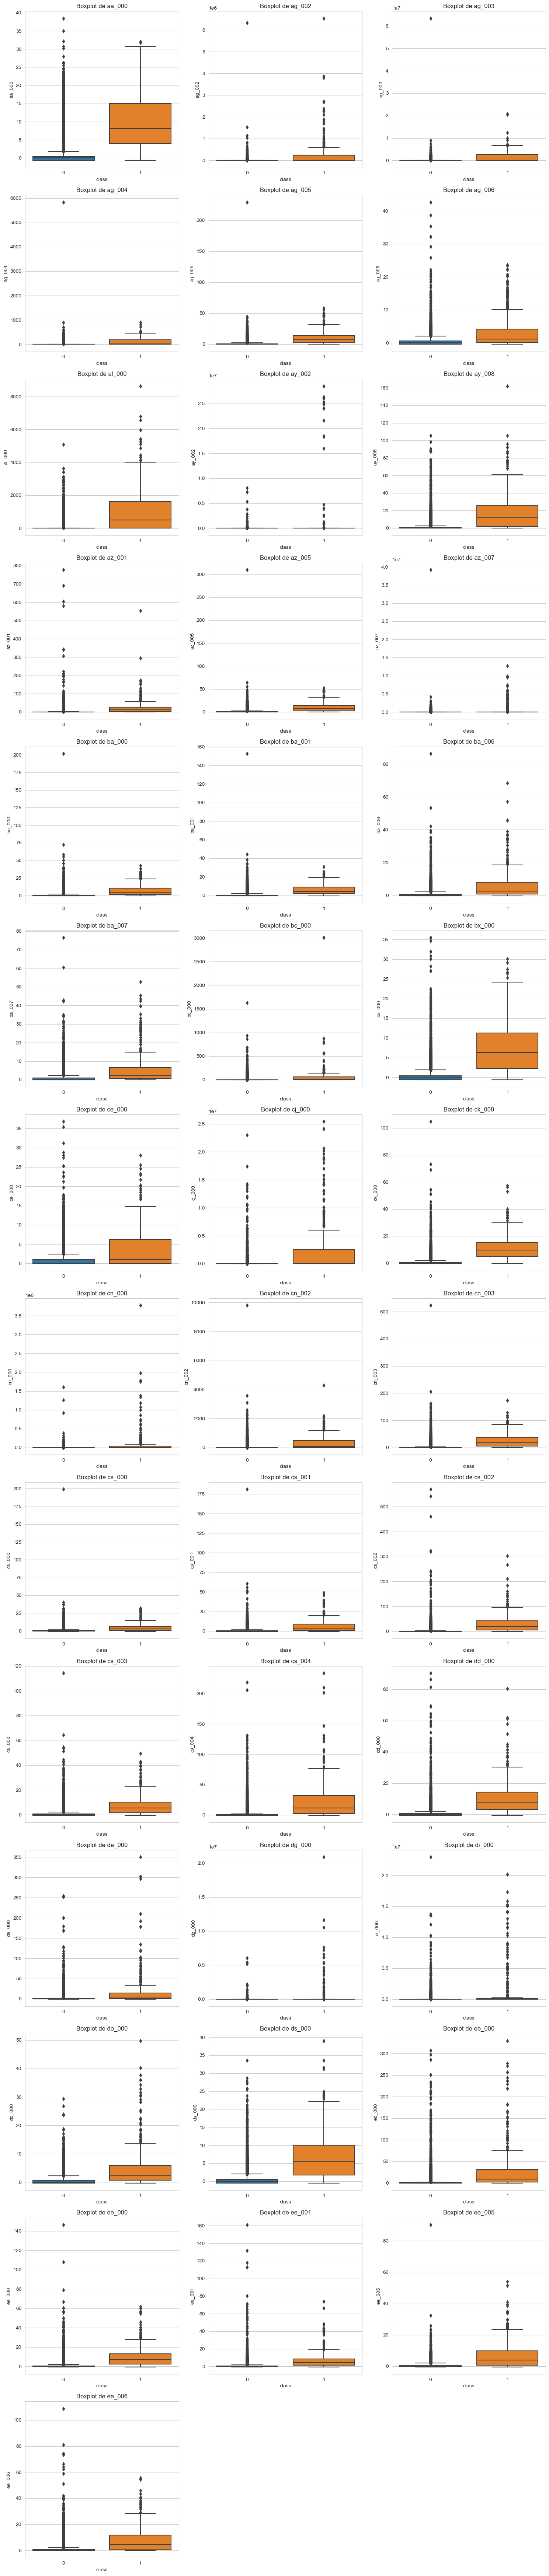

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecionar as colunas que não são a 'class'
columns = clean_data_6.columns.drop('class')

# Calcular o número de subplots necessários
n_cols = len(columns)
n_rows = (n_cols + 2) // 3  # Arredonda para cima se necessário

# Plotar boxplots para cada coluna
plt.figure(figsize=(15, 5 * n_rows))  # Ajuste a altura conforme necessário
for i, column in enumerate(columns):
    plt.subplot(n_rows, 3, i + 1)  # Ajuste o número de colunas por linha aqui, se necessário
    sns.boxplot(x='class', y=column, data=clean_data_6)
    plt.title(f'Boxplot de {column}')

plt.tight_layout()  # Melhora a disposição dos subplots para evitar sobreposição
plt.show()


In [92]:
# Calcular linhas com dados faltantes
linhas_faltantes = clean_data_6.isna().any(axis=1).sum()

# Imprimir a quantidade de linhas com dados faltantes
print(f"Quantidade de linhas com dados faltantes: {linhas_faltantes}")


Quantidade de linhas com dados faltantes: 0


In [165]:
# Selecionar colunas não numéricas
colunas_nao_numericas = clean_data_6.select_dtypes(exclude=['number'])

# Imprimir as colunas não numéricas
print("Colunas não numéricas:")
print(colunas_nao_numericas.columns)


Colunas não numéricas:
Index(['class'], dtype='object')


In [166]:
# Converter a coluna 'class' para numérico
clean_data_7 = clean_data_6.copy()
clean_data_7['class'] = pd.to_numeric(clean_data_6['class'], errors='coerce')

# Verificar se há algum valor NaN após a conversão
if clean_data_7['class'].isnull().any():
    print("Há valores NaN na coluna 'class' após a conversão.")
else:
    print("Conversão realizada com sucesso. Todos os valores são numéricos.")

# Checar novamente as colunas não numéricas
colunas_nao_numericas_apos_conversao = clean_data_7.select_dtypes(exclude=['number'])
print("Colunas não numéricas após conversão:")
print(colunas_nao_numericas_apos_conversao.columns)


Conversão realizada com sucesso. Todos os valores são numéricos.
Colunas não numéricas após conversão:
Index([], dtype='object')


# 5. Modelo Preditivo

## Dividir a base em treino, validação e teste

In [191]:
# dividir a base em treino, validacao e teste
from sklearn.model_selection import train_test_split

# Dividir o DataFrame em atributos e classe
X = clean_data_7.drop(columns='class')
y = clean_data_7['class']

# Dividir o DataFrame em treino (80%) e teste (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.15, random_state=42)

# Dividir o DataFrame de teste em validação (50% dos dados originais) e teste (50% dos dados originais)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Exibir as quantidades de cada conjunto
print(f'Número de amostras de treino: {len(X_train)}')
print(f'Número de amostras de validação: {len(X_val)}')
print(f'Número de amostras de teste: {len(X_test)}')


Número de amostras de treino: 46021
Número de amostras de validação: 4061
Número de amostras de teste: 4061


## Aplicar modelos de classificacao

### Regressão linear adaptado para classificação usando equação normal e função sigmoid para calibração rápida do modelo

In [192]:
# Aplicar modelo de regressao usando equacao normal
import numpy as np


# Função sigmoide robusta
def sigmoid(z):
   
    return 1 / (1 + np.exp(-z))

# Adicionar uma coluna de 1s para representar o termo independente
X_train_augmented = np.c_[np.ones(len(X_train)), X_train]

# Calcular os coeficientes da regressão usando a equação normal
theta = np.linalg.inv(X_train_augmented.T @ X_train_augmented) @ X_train_augmented.T @ y_train

# Prever a classe para os dados de validação
X_val_augmented = np.c_[np.ones(len(X_val)), X_val]
z = np.dot(X_val_augmented, theta)  # Resultado da combinação linear

print(f"z type: {type(z)}, z shape: {np.shape(z)}")  # Verificar o tipo e a forma de z

y_pred_prob = sigmoid(z)  # Aplicar a função sigmoide para obter probabilidades
y_pred = (y_pred_prob >= 0.5).astype(int)  # Classificar como 1 se a probabilidade é >= 0.5


# Calcular a precisao do modelo e o recall
from sklearn.metrics import accuracy_score, recall_score, precision_score

accuracy = accuracy_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)

print(f'Acurácia: {accuracy:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Precisão: {precision:.2f}')

z type: <class 'numpy.ndarray'>, z shape: (4061,)
Acurácia: 0.63
Recall: 0.95
Precisão: 0.01


### Plotagem de curvas para análise e escolha do limiar

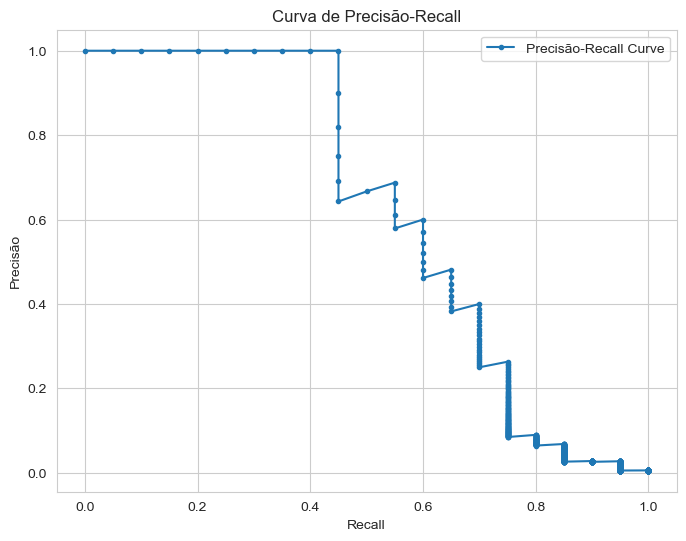

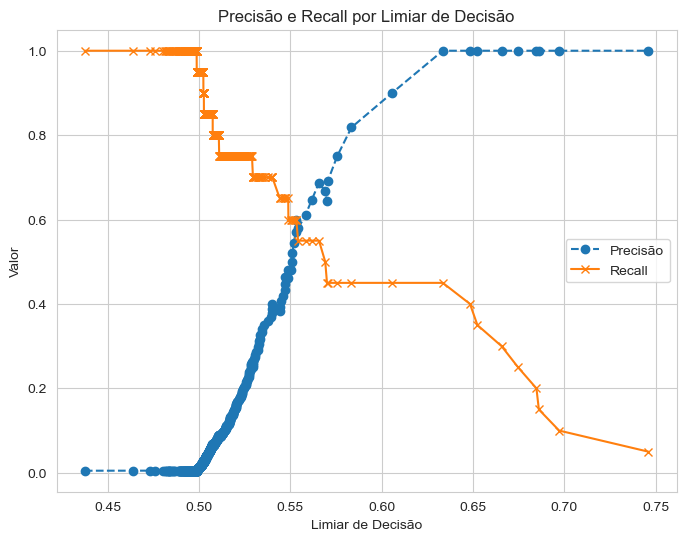

In [193]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Calcular a curva de precisão-recall
precision, recall, thresholds = precision_recall_curve(y_val, y_pred_prob)

# Plotar a curva de precisão-recall
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='Precisão-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva de Precisão-Recall')
plt.legend()
plt.grid(True)
plt.show()

# Adicionalmente, ver como a precisão e o recall mudam com diferentes limiares
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], marker='o', linestyle='--', label='Precisão')
plt.plot(thresholds, recall[:-1], marker='x', label='Recall')
plt.xlabel('Limiar de Decisão')
plt.ylabel('Valor')
plt.title('Precisão e Recall por Limiar de Decisão')
plt.legend()
plt.grid(True)
plt.show()

### Remoção de outliers da base de treino utilizando o regressor

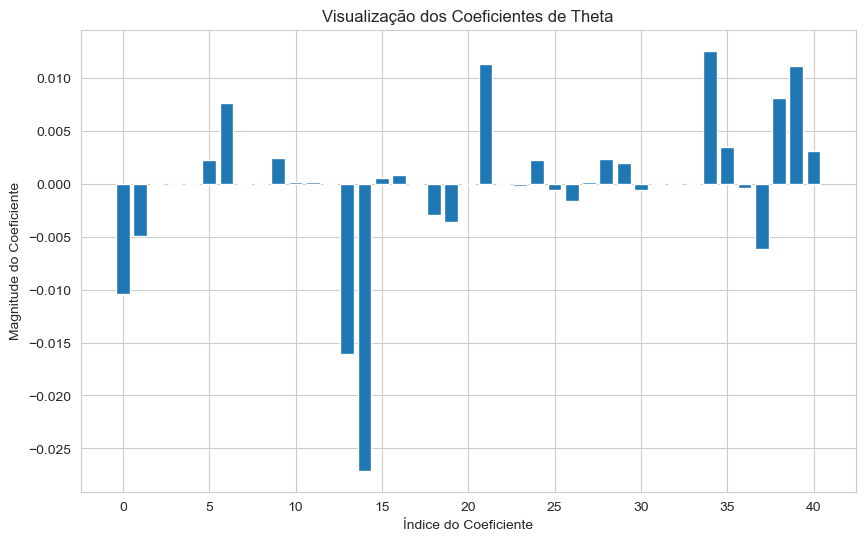

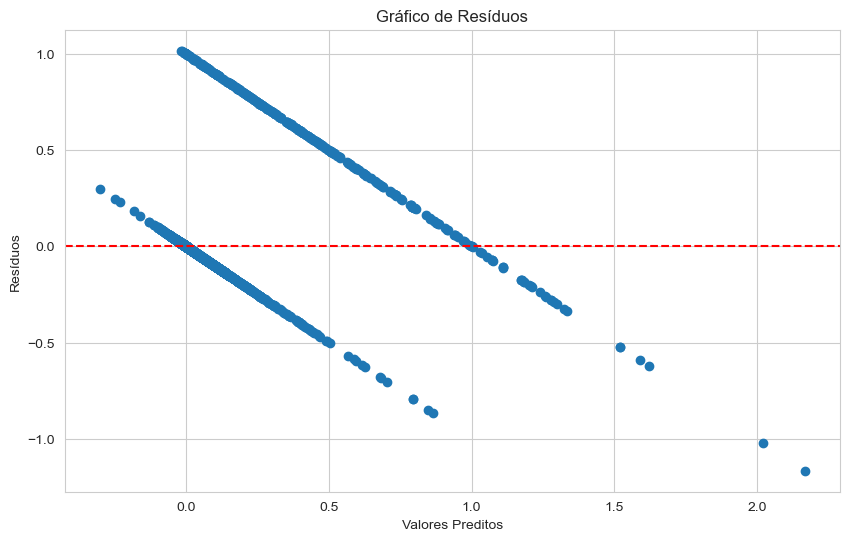

Índices de outliers identificados: [   45   214   412   418   554   701   787   810   879   924   950   952
   958  1260  1326  1329  1379  1432  1609  1671  1690  1720  1834  1882
  1907  2091  2256  2291  2346  2350  2388  2413  2475  2511  2557  2620
  2639  2736  2773  2774  2950  2971  2999  3124  3230  3236  3245  3412
  3576  3832  3872  3889  4128  4385  4541  4569  4687  4918  5080  5102
  5154  5167  5360  5410  5447  5524  5555  5622  5858  6116  6324  6482
  6494  6964  7055  7105  7197  7240  7288  7417  7480  7592  7663  7760
  7996  8089  8141  8180  8214  8217  8462  8475  8477  8496  8514  8578
  8611  8653  8773  8789  9000  9049  9058  9168  9226  9282  9310  9387
  9413  9597  9626  9663  9866  9937  9948 10015 10249 10260 10410 10573
 10638 10723 10724 10952 10953 11181 11228 11311 11439 11647 12067 12154
 12161 12178 12218 12251 12264 12567 12671 12707 12848 13088 13104 13155
 13472 13577 13672 13719 13723 13878 13913 13958 14157 14239 14442 14584
 14653 14766 149

In [194]:
import numpy as np
import matplotlib.pyplot as plt

# Plotar os coeficientes theta para visualização
plt.figure(figsize=(10, 6))
plt.bar(range(len(theta)), theta)
plt.xlabel('Índice do Coeficiente')
plt.ylabel('Magnitude do Coeficiente')
plt.title('Visualização dos Coeficientes de Theta')
plt.show()

# Calcular valores preditos e resíduos
y_pred_train = np.dot(X_train_augmented, theta)
residuos = y_train - y_pred_train

# Plotar os resíduos para identificar outliers
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_train, residuos)
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Gráfico de Resíduos')
plt.show()

# Identificar outliers potenciais (ex., resíduos muito grandes)
outlier_threshold = np.std(residuos) * 3  # Exemplo de limiar: 3 desvios padrão
outliers = np.where(np.abs(residuos) > outlier_threshold)[0]

print("Índices de outliers identificados:", outliers)

### Remocao dos outliers identificados

In [195]:
import numpy as np
import pandas as pd

# Supondo que X_train e y_train são os seus dados de treinamento

# Resetar os índices de X_train e y_train
X_train_temp = X_train.reset_index(drop=True)
y_train_temp = y_train.reset_index(drop=True)

# Adicionar uma coluna de 1s para representar o termo independente
X_train_augmented = np.c_[np.ones(len(X_train_temp)), X_train_temp]

# Calcular os coeficientes da regressão usando a equação normal
theta = np.linalg.inv(X_train_augmented.T @ X_train_augmented) @ X_train_augmented.T @ y_train_temp

# Prever a classe para os dados de treinamento
y_pred_train = np.dot(X_train_augmented, theta)

# Calcular os resíduos
residuos = y_train_temp - y_pred_train

# Definir um limiar para identificar outliers, por exemplo, 3 desvios padrão
outlier_threshold = 3 * np.std(residuos)

# Identificar índices de outliers
outliers = np.where(np.abs(residuos) > outlier_threshold)[0]

# Remover outliers
X_train_clean = X_train_temp.drop(index=outliers)
y_train_clean = y_train_temp.drop(index=outliers)

# Verificar o novo tamanho dos dados
print(f"Quantidade original de amostras em X_train: {X_train_temp.shape[0]}")
print(f"Quantidade após remoção de outliers em X_train: {X_train_clean.shape[0]}")
print(f"Quantidade original de amostras em y_train: {y_train_temp.shape[0]}")
print(f"Quantidade após remoção de outliers em y_train: {y_train_clean.shape[0]}")


Quantidade original de amostras em X_train: 46021
Quantidade após remoção de outliers em X_train: 45535
Quantidade original de amostras em y_train: 46021
Quantidade após remoção de outliers em y_train: 45535


### Treinando novamente o regressor, mas agora com os outliers removidos da base de treino

In [196]:
import numpy as np

# Função sigmoide para a regressão logística
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Adicionar uma coluna de 1s para representar o termo independente no conjunto limpo
X_train_clean_augmented = np.c_[np.ones(len(X_train_clean)), X_train_clean]

# Calcular os coeficientes da regressão usando a equação normal no conjunto limpo
theta_clean = np.linalg.inv(X_train_clean_augmented.T @ X_train_clean_augmented) @ X_train_clean_augmented.T @ y_train_clean

# Prever a probabilidade para os dados de treinamento limpos usando a função sigmoide
y_pred_train_clean_prob = sigmoid(np.dot(X_train_clean_augmented, theta_clean))

# Classificar como 1 se a probabilidade é >= 0.5, caso contrário 0
y_pred_train_clean = (y_pred_train_clean_prob >= 0.62).astype(int)

# Avaliar o modelo
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_train_clean, y_pred_train_clean)
precision = precision_score(y_train_clean, y_pred_train_clean)
recall = recall_score(y_train_clean, y_pred_train_clean)
f1 = f1_score(y_train_clean, y_pred_train_clean)
roc_auc = roc_auc_score(y_train_clean, y_pred_train_clean_prob)

print(f"Coeficientes (Theta) re-treinados: {theta_clean}")
print(f"Acurácia no conjunto de treinamento limpo: {accuracy:.4f}")
print(f"Precisão no conjunto de treinamento limpo: {precision:.4f}")
print(f"Recall no conjunto de treinamento limpo: {recall:.4f}")
print(f"F1-Score no conjunto de treinamento limpo: {f1:.4f}")
print(f"AUC-ROC no conjunto de treinamento limpo: {roc_auc:.4f}")


Coeficientes (Theta) re-treinados: [-5.29706442e-03 -6.60403724e-03  1.46834156e-07  3.63601417e-08
 -1.15741936e-04  5.30338308e-04  5.59600865e-03  8.08603093e-05
  4.42335851e-08  9.50212948e-04  2.23098014e-05 -2.47993657e-06
  1.84175767e-08 -1.11153679e-02 -1.09425275e-02 -1.20579817e-04
 -2.96506578e-04  2.49686344e-06  6.40019522e-03  8.01307168e-04
  2.63015829e-08  8.26658145e-03  6.73562340e-08 -1.11277063e-04
  1.35314495e-03  4.30563721e-04 -1.88656410e-03  3.12347394e-04
  2.14244786e-03  1.22594496e-03 -7.22249565e-04  8.25335062e-05
  6.77705648e-08 -8.12307409e-09  2.62049246e-03 -1.91187257e-03
 -1.13877826e-04 -8.23647194e-03  3.51202905e-03  5.94185867e-03
  1.29929787e-03]
Acurácia no conjunto de treinamento limpo: 1.0000
Precisão no conjunto de treinamento limpo: 1.0000
Recall no conjunto de treinamento limpo: 0.9487
F1-Score no conjunto de treinamento limpo: 0.9737
AUC-ROC no conjunto de treinamento limpo: 1.0000


### Plotando as curvas novamente

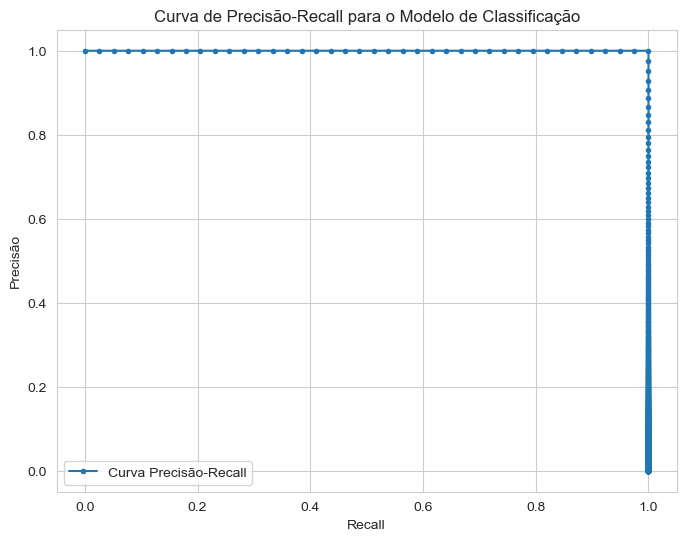

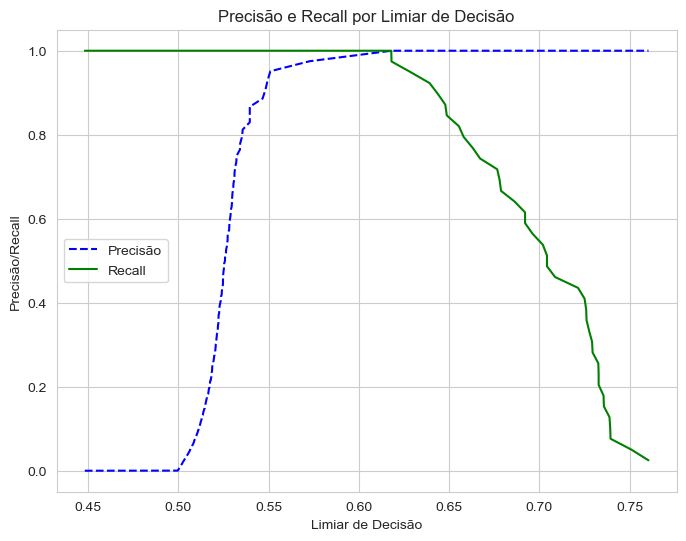

In [197]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Calcular a curva de precisão-recall
precision, recall, thresholds = precision_recall_curve(y_train_clean, y_pred_train_clean_prob)

# Plotar a curva de precisão-recall
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='Curva Precisão-Recall')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva de Precisão-Recall para o Modelo de Classificação')
plt.legend()
plt.grid(True)
plt.show()

# Para um entendimento adicional, plotar precisão e recall em função dos limiares
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], 'b--', label='Precisão')
plt.plot(thresholds, recall[:-1], 'g-', label='Recall')
plt.xlabel('Limiar de Decisão')
plt.ylabel('Precisão/Recall')
plt.title('Precisão e Recall por Limiar de Decisão')
plt.legend()
plt.grid(True)
plt.show()


### Aplicando o regressor treinado na base de validação e realizando as análises

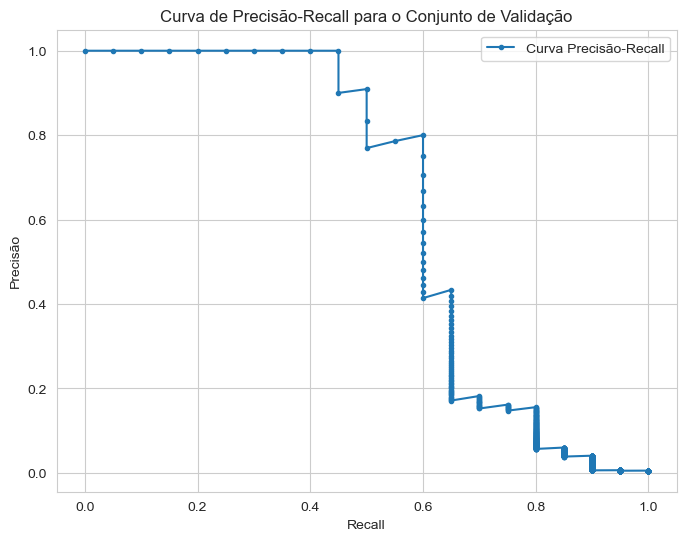

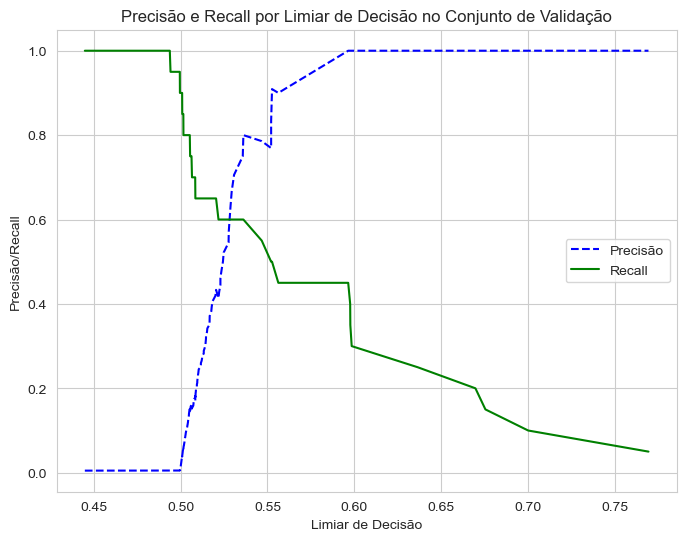

Melhor limiar de decisão para F1-Score: 0.5361
Acurácia ajustada: 0.9973
Precisão ajustada: 0.8000
Recall ajustado: 0.6000
F1-Score ajustado: 0.6857
Melhor limiar de decisão para precisao: 0.5965
Acurácia ajustada: 0.9973
Precisão ajustada: 1.0000
Recall ajustado: 0.4500
F1-Score ajustado: 0.6207


In [210]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Analisar os limiares para escolher o melhor
# Este código busca o limiar que maximiza a precisão enquanto mantém um recall aceitável
X_val_augmented = np.c_[np.ones(len(X_val)), X_val]

# Prever a probabilidade para os dados de treinamento limpos usando a função sigmoide
y_pred_val_prob = sigmoid(np.dot(X_val_augmented, theta_clean))

precision_val, recall_val, thresholds_val = precision_recall_curve(y_val, y_pred_val_prob)
f1Scores = 2 * precision_val * recall_val / (precision_val + recall_val)

# Plotar a curva de precisão-recall
plt.figure(figsize=(8, 6))
plt.plot(recall_val, precision_val, marker='.', label='Curva Precisão-Recall')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva de Precisão-Recall para o Conjunto de Validação')
plt.legend()
plt.grid(True)
plt.show()

# Plotar precisão e recall em função dos limiares
plt.figure(figsize=(8, 6))
plt.plot(thresholds_val, precision_val[:-1], 'b--', label='Precisão')
plt.plot(thresholds_val, recall_val[:-1], 'g-', label='Recall')
plt.xlabel('Limiar de Decisão')
plt.ylabel('Precisão/Recall')
plt.title('Precisão e Recall por Limiar de Decisão no Conjunto de Validação')
plt.legend()
plt.grid(True)
plt.show()


maxF1ScoreIndex = np.argmax(f1Scores)
best_threshold = thresholds_val[maxF1ScoreIndex]
print(f"Melhor limiar de decisão para F1-Score: {best_threshold:.4f}")

# Você pode também usar esse limiar para definir predições finais e recalibrar seu modelo para aplicações práticas
y_val_pred_adjusted = (y_pred_val_prob >= best_threshold).astype(int)

accuracy = accuracy_score(y_val, y_val_pred_adjusted)
precision = precision_score(y_val, y_val_pred_adjusted)
recall = recall_score(y_val, y_val_pred_adjusted)
f1 = f1_score(y_val, y_val_pred_adjusted)

print(f"Acurácia ajustada: {accuracy:.4f}")
print(f"Precisão ajustada: {precision:.4f}")
print(f"Recall ajustado: {recall:.4f}")
print(f"F1-Score ajustado: {f1:.4f}")

maxScoreIndex = np.argmax(precision_val)
best_threshold = thresholds_val[maxScoreIndex]
print(f"Melhor limiar de decisão para precisao: {best_threshold:.4f}")

# Você pode também usar esse limiar para definir predições finais e recalibrar seu modelo para aplicações práticas
y_val_pred_adjusted = (y_pred_val_prob >= best_threshold).astype(int)

# Calculando métricas finais com o novo limiar

accuracy = accuracy_score(y_val, y_val_pred_adjusted)
precision = precision_score(y_val, y_val_pred_adjusted)
recall = recall_score(y_val, y_val_pred_adjusted)
f1 = f1_score(y_val, y_val_pred_adjusted)

print(f"Acurácia ajustada: {accuracy:.4f}")
print(f"Precisão ajustada: {precision:.4f}")
print(f"Recall ajustado: {recall:.4f}")
print(f"F1-Score ajustado: {f1:.4f}")

## Usando Regressor Logistico com regularizacao e usando o desbalanceamento para ponderar o classificador

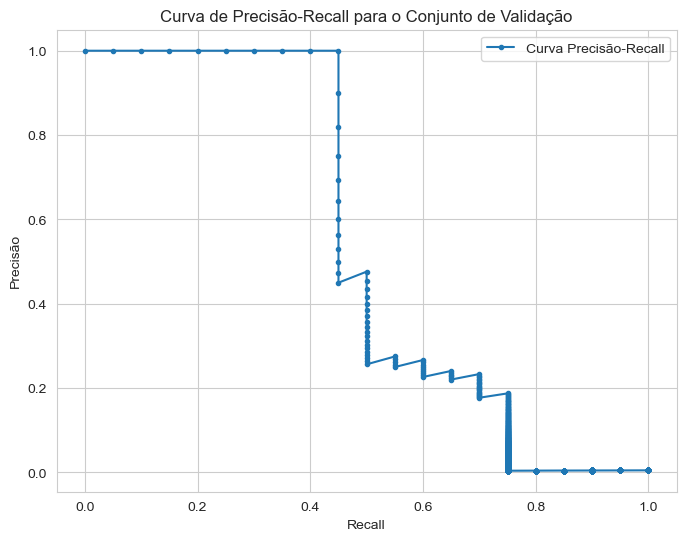

Melhor limiar de decisão para F1-Score: 0.9847
Com precisão: 1.0000 e recall: 0.4500
F1-Score: 0.6207
AUC-ROC: 0.7633
Acurácia ajustada: 0.9973
Precisão ajustada: 1.0000
Recall ajustado: 0.4500
F1-Score ajustado: 0.6207


In [213]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

# Opção 1: Calcular pesos das classes manualmente
classes = np.unique(y_train_clean)
weights = compute_class_weight('balanced', classes=classes, y=y_train_clean)
class_weight = dict(zip(classes, weights))

class_weight[1] *= 0.5

# Instanciar e treinar o modelo com regularização L2
model = LogisticRegression(penalty='l2', C=0.01, solver='lbfgs', max_iter=5000, class_weight=class_weight)  # Ajuste o valor de C conforme necessário
model.fit(X_train_clean, y_train_clean)

# Predizer probabilidades para o conjunto de validação
y_val_prob = model.predict_proba(X_val)[:, 1]

# Calcular a curva de precisão-recall
precision, recall, thresholds = precision_recall_curve(y_val, y_val_prob)
roc_auc = roc_auc_score(y_val, y_val_prob)

# Plotar a curva de precisão-recall
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='Curva Precisão-Recall')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva de Precisão-Recall para o Conjunto de Validação')
plt.legend()
plt.grid(True)
plt.show()

# Encontrar o limiar ótimo - Aqui você pode ajustar o critério para selecionar o limiar
# Por exemplo, encontrar o ponto mais próximo ao canto superior direito (máximo recall e precisão)
fscore = (2 * precision * recall) / (precision + recall)
ix = np.argmax(fscore)
best_threshold_f1 = thresholds[ix]

print(f"Melhor limiar de decisão para F1-Score: {best_threshold_f1:.4f}")
print(f"Com precisão: {precision[ix]:.4f} e recall: {recall[ix]:.4f}")
print(f"F1-Score: {fscore[ix]:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")

# Você pode também usar esse limiar para definir predições finais e recalibrar seu modelo para aplicações práticas
y_val_pred_adjusted = (y_val_prob >= best_threshold_f1).astype(int)

# Calculando métricas finais com o novo limiar
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_val, y_val_pred_adjusted)
precision = precision_score(y_val, y_val_pred_adjusted)
recall = recall_score(y_val, y_val_pred_adjusted)
f1 = f1_score(y_val, y_val_pred_adjusted)

print(f"Acurácia ajustada: {accuracy:.4f}")
print(f"Precisão ajustada: {precision:.4f}")
print(f"Recall ajustado: {recall:.4f}")
print(f"F1-Score ajustado: {f1:.4f}")


Aplicando na base de teste

In [216]:
# Predizer probabilidades para o conjunto de validação
y_prob = model.predict_proba(X_test)[:, 1]

# Você pode também usar esse limiar para definir predições finais e recalibrar seu modelo para aplicações práticas
y_pred_adjusted = (y_prob >= best_threshold_f1).astype(int)

# Calculando métricas finais com o novo limiar
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred_adjusted)
precision = precision_score(y_test, y_pred_adjusted)
recall = recall_score(y_test, y_pred_adjusted)
f1 = f1_score(y_test, y_pred_adjusted)

print(f"Acurácia ajustada: {accuracy:.4f}")
print(f"Precisão ajustada: {precision:.4f}")
print(f"Recall ajustado: {recall:.4f}")
print(f"F1-Score ajustado: {f1:.4f}")



Acurácia ajustada: 0.9936
Precisão ajustada: 0.6923
Recall ajustado: 0.2903
F1-Score ajustado: 0.4091
